In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyspedas
from pytplot import tplot

07-Oct-20 10:00:58: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



(-6.0, 6.0)

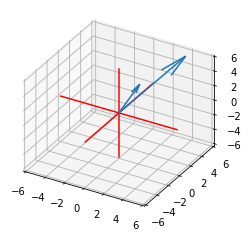

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
a = [1,2,3]
b = [4,5,6]
data = np.column_stack((a,b))
origins = np.zeros(np.shape(data))
ax.quiver(*origins, *data)


scale_factor = 6
xl = ((-scale_factor,scale_factor),(0,0),(0,0))
yl = ((0,0),(-scale_factor,scale_factor),(0,0))
zl = ((0,0),(0,0),(-scale_factor,scale_factor))
for l in [xl,yl,zl]:
    ax.plot(*l, 'r')
ax.set_xlim(-scale_factor,scale_factor)
ax.set_ylim(-scale_factor,scale_factor)
ax.set_zlim(-scale_factor,scale_factor)

In [15]:
a = np.ones((20,3))*10
a_mod = np.sqrt(np.sum(np.power(a,2),axis=1))
a_scale = a/a_mod[:,None]
a_scale

array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027]])

In [16]:
trange = ["2017-01-26/08:14:58", "2017-01-26/08:15:04"]
probe = "1"
data_rate = "brst"
mms_edp = pyspedas.mms.edp(
    trange=trange, probe=probe, data_rate=data_rate, time_clip=True
)

07-Oct-20 10:00:59: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms1/edp/brst/l2/dce/2017/01/26/mms1_edp_brst_l2_dce_20170126081303_v2.2.0.cdf
Time clip was applied to: mms1_edp_dce_gse_brst_l2
Time clip was applied to: mms1_edp_dce_dsl_brst_l2
Time clip was applied to: mms1_edp_dce_par_epar_brst_l2
Loaded variables:
mms1_edp_dce_gse_brst_l2
mms1_edp_dce_dsl_brst_l2
mms1_edp_dce_par_epar_brst_l2


In [18]:
tplot('mms1_edp_dce_gse_brst_l2')

In [19]:
trange = ["2017-01-26/08:14:58", "2017-01-26/08:15:04"]
probe = "1"
data_rate = "brst"
# Load FPI data (electron & ion)
mms_fgm = pyspedas.mms.fpi(
    trange=trange, probe=probe, data_rate=data_rate, time_clip=True
)
# Load FGM data (B)
# mms_fgm = pyspedas.mms.fgm(trange=trange, probe=probe, data_rate=data_rate)
fgm_all = pyspedas.mms.fgm(
    trange=trange, probe=["1", "2", "3", "4"], data_rate=data_rate, time_clip=True
)

# Load EDP data (e)
mms_edp = pyspedas.mms.edp(
    trange=trange, probe=probe, data_rate=data_rate, time_clip=True
)

07-Oct-20 10:31:03: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms1/fpi/brst/l2/des-moms/2017/01/26/mms1_fpi_brst_l2_des-moms_20170126081303_v3.3.0.cdf
07-Oct-20 10:31:03: Loading /home/janmes/Documents/PhD/PhD-Starter-Project/mms_data/mms1/fpi/brst/l2/dis-moms/2017/01/26/mms1_fpi_brst_l2_dis-moms_20170126081303_v3.3.0.cdf
Time clip was applied to: mms1_des_errorflags_brst
Time clip was applied to: mms1_des_compressionloss_brst
Time clip was applied to: mms1_des_startdelphi_count_brst
Time clip was applied to: mms1_des_startdelphi_angle_brst
Time clip was applied to: mms1_des_sector_despinp_brst
Time clip was applied to: mms1_des_pitchangdist_lowen_brst
Time clip was applied to: mms1_des_pitchangdist_miden_brst
Time clip was applied to: mms1_des_pitchangdist_highen_brst
Time clip was applied to: mms1_des_energyspectr_px_brst
Time clip was applied to: mms1_des_energyspectr_mx_brst
Time clip was applied to: mms1_des_energyspectr_py_brst
Time clip was applied to: mms1

In [33]:
from pytplot import store_data, data_quants
pyspedas.tinterpol(
    ["mms1_des_bulkv_gse_brst", "mms1_fgm_b_gse_brst_l2"],
    "mms1_edp_dce_gse_brst_l2",
    newname=["v_e-itrpE", "B-itrpE"],
)
v_e_itrpE = data_quants["v_e-itrpE"].values * 1000
mag_itrpE = data_quants["B-itrpE"].values[:, :3] * 1e-9
crossVeB = np.cross(v_e_itrpE, mag_itrpE) * 1e3
print(v_e_itrpE)
print(mag_itrpE)
E = data_quants["mms1_edp_dce_gse_brst_l2"].values
E_time = data_quants["mms1_edp_dce_gse_brst_l2"].coords["time"].values
E_prime = E + crossVeB

07-Oct-20 10:54:40: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

tinterpol (linear) was applied to: v_e-itrpE
tinterpol (linear) was applied to: B-itrpE
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


07-Oct-20 10:54:43: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



[&lt;matplotlib.lines.Line2D at 0x7fb2ae5d9400&gt;,
 &lt;matplotlib.lines.Line2D at 0x7fb2ae7d6190&gt;,
 &lt;matplotlib.lines.Line2D at 0x7fb2ae7d68b0&gt;]

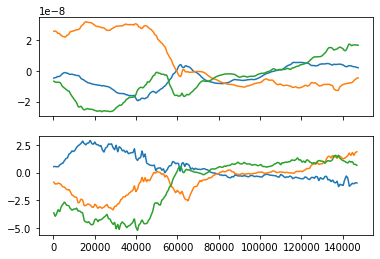

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(mag_itrpE)
ax[1].plot(crossVeB)

In [32]:
tplot('mms1_edp_dce_gse_brst_l2')

07-Oct-20 10:54:01: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

07-Oct-20 10:54:02: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/pytplot/QtPlotter/CustomAxis/AxisItem.py:159: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)

07-Oct-20 10:54:02: /home/janmes/Documents/PhD/PhD-Starter-Project/env/lib/python3.8/site-packages/pyqtgraph/widgets/GraphicsView.py:374: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using 